In [138]:
from __future__ import print_function
import argparse
import os
import random
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
%matplotlib inline

import sys

sys.path.append("..")

import GanUtils as utils
import GaussianMixtureUtils as GMutils

sys.path.append("../DiscriminativeNN")

import DiscGaussianMixture5Layers as disc

sys.path.append("../GenerativeNN")

import GenGaussianMixture5Layers as gen

manualSeed = random.randint(1, 10000) # fix seed
print("Random Seed: ", manualSeed)
random.seed(manualSeed)
torch.manual_seed(manualSeed)

Random Seed:  3531


In [139]:
batchSize = 64
nz = 100
nc = 2 # Number of outputs
ndf = 10
ngf = 10
niter = 10
nElements = 10000
lr = 0.00002
beta1 = 0.5

In [140]:
netG = gen._netG(nc, ngf, nz)
netG.apply(utils.weights_init)

netD = disc._netD(nc, ndf)
netD.apply(utils.weights_init)

_netD (
  (main): Sequential (
    (0): Linear (2 -> 10)
    (1): LeakyReLU (0.2, inplace)
    (2): Linear (10 -> 20)
    (3): BatchNorm1d(20, eps=1e-05, momentum=0.1, affine=True)
    (4): LeakyReLU (0.2, inplace)
    (5): Linear (20 -> 40)
    (6): BatchNorm1d(40, eps=1e-05, momentum=0.1, affine=True)
    (7): LeakyReLU (0.2, inplace)
    (8): Linear (40 -> 80)
    (9): BatchNorm1d(80, eps=1e-05, momentum=0.1, affine=True)
    (10): LeakyReLU (0.2, inplace)
    (11): Linear (80 -> 1)
    (12): Sigmoid ()
  )
)

In [141]:
criterion = nn.KLDivLoss()

# Might mistake here
input = torch.FloatTensor(batchSize, 2)
noise = torch.FloatTensor(batchSize, nz)
fixed_noise = torch.FloatTensor(batchSize, nz).normal_(0, 1)
label = torch.FloatTensor(batchSize)
real_label = 1
fake_label = 0

input = Variable(input)
label = Variable(label)
noise = Variable(noise)
fixed_noise = Variable(fixed_noise)

# setup optimizer
optimizerD = optim.Adam(netD.parameters(), lr = lr, betas = (beta1, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr = lr, betas = (beta1, 0.999))

 Target distribution ... 


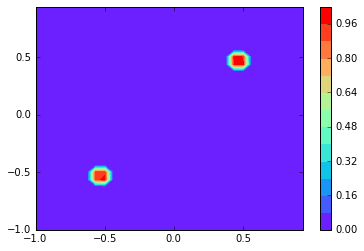

In [142]:
print(" Target distribution ... ")
GMutils.plot_heat_map(GMutils.sample(10000))

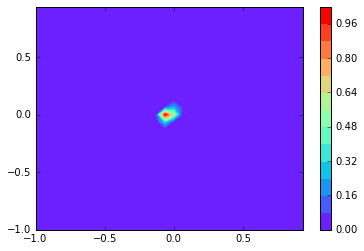

[0/11][0/10000] Loss_D: -0.4839 Loss_G: -0.4870 D(x): 0.4839 D(G(z)): 0.4854 / 0.4870


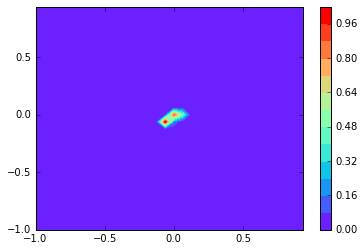

[0/11][1000/10000] Loss_D: -0.6503 Loss_G: -0.6232 D(x): 0.6503 D(G(z)): 0.6238 / 0.6232


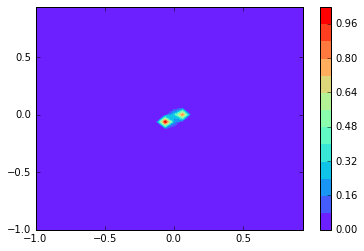

[0/11][2000/10000] Loss_D: -0.7669 Loss_G: -0.7516 D(x): 0.7669 D(G(z)): 0.7524 / 0.7516


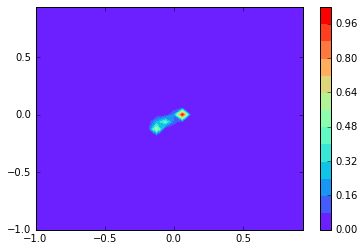

[0/11][3000/10000] Loss_D: -0.8638 Loss_G: -0.8508 D(x): 0.8638 D(G(z)): 0.8494 / 0.8508


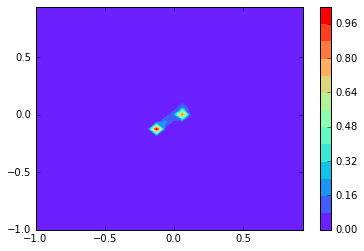

[0/11][4000/10000] Loss_D: -0.9096 Loss_G: -0.9059 D(x): 0.9096 D(G(z)): 0.9104 / 0.9059


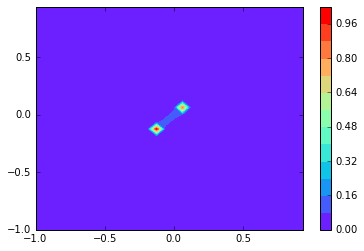

[0/11][5000/10000] Loss_D: -0.9493 Loss_G: -0.9440 D(x): 0.9493 D(G(z)): 0.9401 / 0.9440


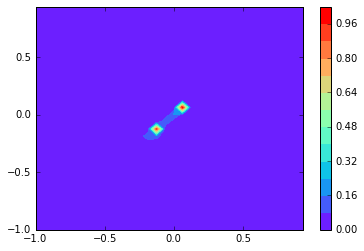

[0/11][6000/10000] Loss_D: -0.9658 Loss_G: -0.9632 D(x): 0.9658 D(G(z)): 0.9635 / 0.9632


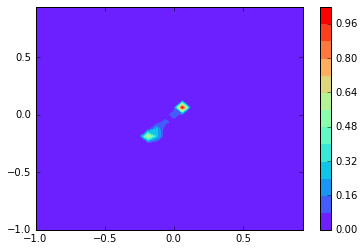

[0/11][7000/10000] Loss_D: -0.9800 Loss_G: -0.9773 D(x): 0.9800 D(G(z)): 0.9762 / 0.9773


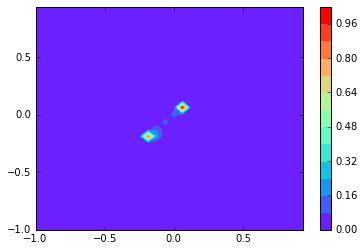

[0/11][8000/10000] Loss_D: -0.9872 Loss_G: -0.9837 D(x): 0.9872 D(G(z)): 0.9864 / 0.9837


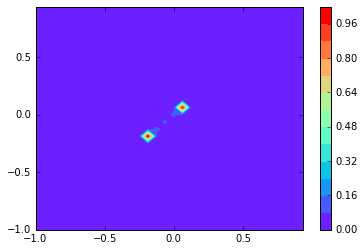

[0/11][9000/10000] Loss_D: -0.9908 Loss_G: -0.9901 D(x): 0.9908 D(G(z)): 0.9899 / 0.9901


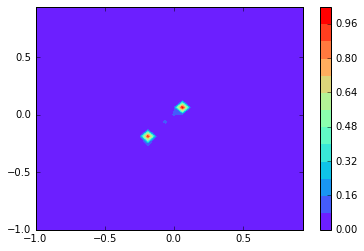

[1/11][0/10000] Loss_D: -0.9945 Loss_G: -0.9937 D(x): 0.9945 D(G(z)): 0.9934 / 0.9937


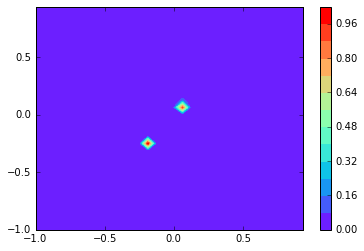

[1/11][1000/10000] Loss_D: -0.9960 Loss_G: -0.9957 D(x): 0.9960 D(G(z)): 0.9959 / 0.9957


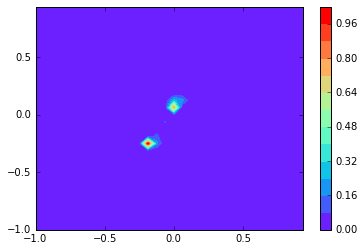

[1/11][2000/10000] Loss_D: -0.9964 Loss_G: -0.9973 D(x): 0.9964 D(G(z)): 0.9972 / 0.9973


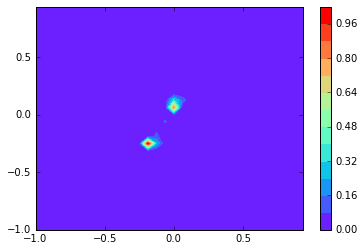

[1/11][3000/10000] Loss_D: -0.9986 Loss_G: -0.9982 D(x): 0.9986 D(G(z)): 0.9982 / 0.9982


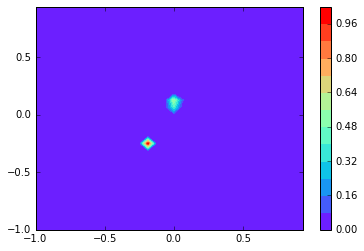

[1/11][4000/10000] Loss_D: -0.9990 Loss_G: -0.9987 D(x): 0.9990 D(G(z)): 0.9987 / 0.9987


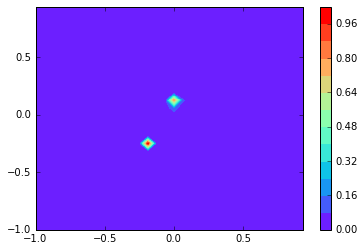

[1/11][5000/10000] Loss_D: -0.9994 Loss_G: -0.9992 D(x): 0.9994 D(G(z)): 0.9992 / 0.9992


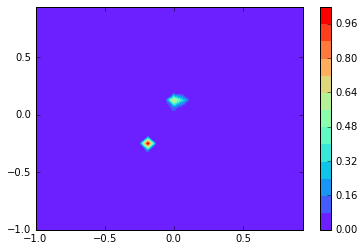

[1/11][6000/10000] Loss_D: -0.9996 Loss_G: -0.9995 D(x): 0.9996 D(G(z)): 0.9994 / 0.9995


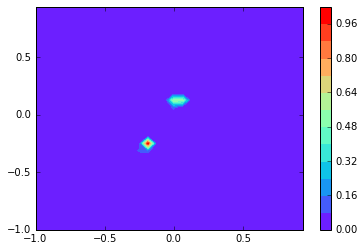

[1/11][7000/10000] Loss_D: -0.9996 Loss_G: -0.9997 D(x): 0.9996 D(G(z)): 0.9997 / 0.9997


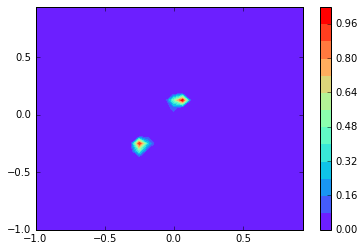

[1/11][8000/10000] Loss_D: -0.9998 Loss_G: -0.9998 D(x): 0.9998 D(G(z)): 0.9998 / 0.9998


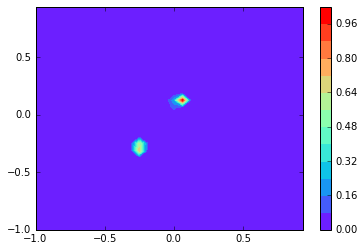

[1/11][9000/10000] Loss_D: -0.9999 Loss_G: -0.9999 D(x): 0.9999 D(G(z)): 0.9999 / 0.9999


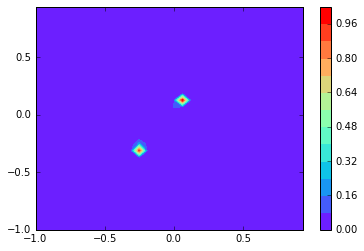

[2/11][0/10000] Loss_D: -0.9999 Loss_G: -0.9999 D(x): 0.9999 D(G(z)): 0.9999 / 0.9999


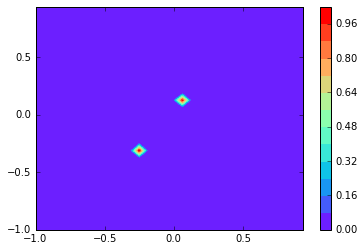

[2/11][1000/10000] Loss_D: -1.0000 Loss_G: -0.9999 D(x): 1.0000 D(G(z)): 0.9999 / 0.9999


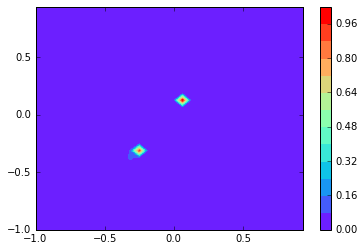

[2/11][2000/10000] Loss_D: -1.0000 Loss_G: -1.0000 D(x): 1.0000 D(G(z)): 1.0000 / 1.0000


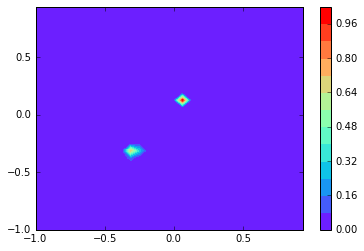

[2/11][3000/10000] Loss_D: -1.0000 Loss_G: -1.0000 D(x): 1.0000 D(G(z)): 1.0000 / 1.0000


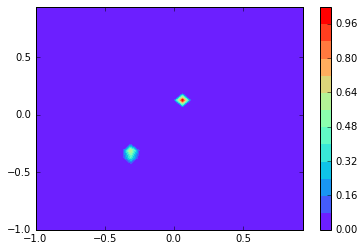

[2/11][4000/10000] Loss_D: -1.0000 Loss_G: -1.0000 D(x): 1.0000 D(G(z)): 1.0000 / 1.0000


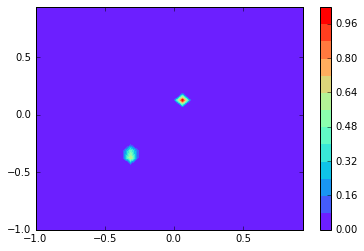

[2/11][5000/10000] Loss_D: -1.0000 Loss_G: -1.0000 D(x): 1.0000 D(G(z)): 1.0000 / 1.0000


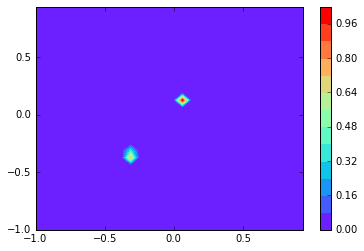

[2/11][6000/10000] Loss_D: -1.0000 Loss_G: -1.0000 D(x): 1.0000 D(G(z)): 1.0000 / 1.0000


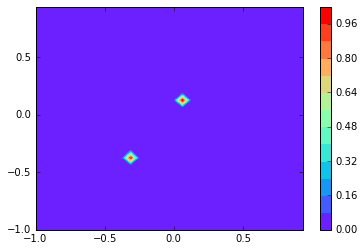

[2/11][7000/10000] Loss_D: -1.0000 Loss_G: -1.0000 D(x): 1.0000 D(G(z)): 1.0000 / 1.0000


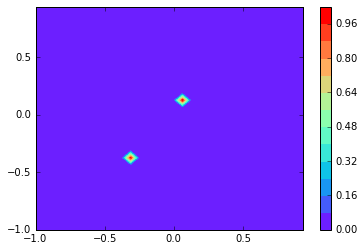

[2/11][8000/10000] Loss_D: -1.0000 Loss_G: -1.0000 D(x): 1.0000 D(G(z)): 1.0000 / 1.0000


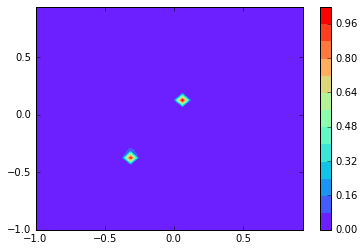

[2/11][9000/10000] Loss_D: -1.0000 Loss_G: -1.0000 D(x): 1.0000 D(G(z)): 1.0000 / 1.0000


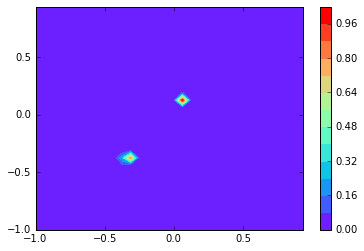

[3/11][0/10000] Loss_D: -1.0000 Loss_G: -1.0000 D(x): 1.0000 D(G(z)): 1.0000 / 1.0000


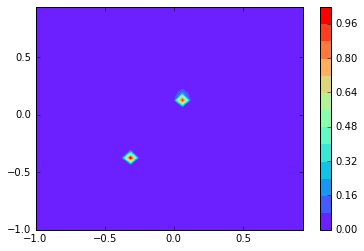

[3/11][1000/10000] Loss_D: -1.0000 Loss_G: -1.0000 D(x): 1.0000 D(G(z)): 1.0000 / 1.0000


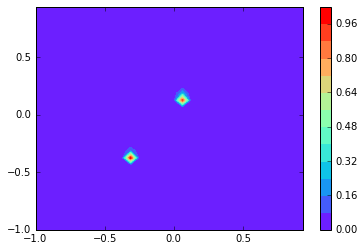

[3/11][2000/10000] Loss_D: -1.0000 Loss_G: -1.0000 D(x): 1.0000 D(G(z)): 1.0000 / 1.0000


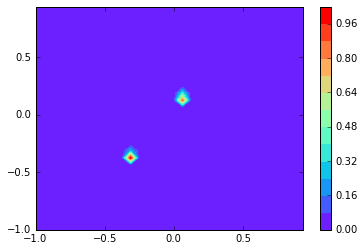

[3/11][3000/10000] Loss_D: -1.0000 Loss_G: -1.0000 D(x): 1.0000 D(G(z)): 1.0000 / 1.0000


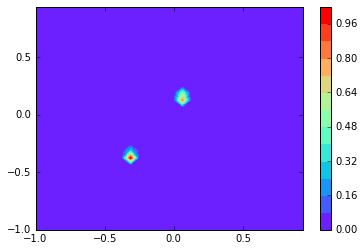

[3/11][4000/10000] Loss_D: -1.0000 Loss_G: -1.0000 D(x): 1.0000 D(G(z)): 1.0000 / 1.0000


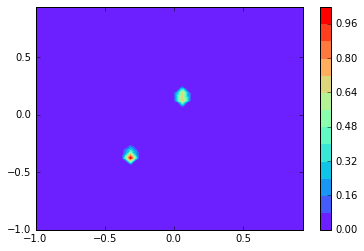

[3/11][5000/10000] Loss_D: -1.0000 Loss_G: -1.0000 D(x): 1.0000 D(G(z)): 1.0000 / 1.0000


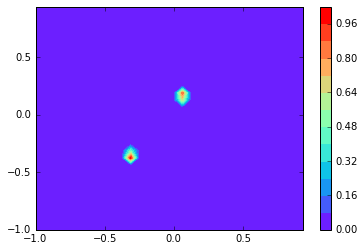

[3/11][6000/10000] Loss_D: -1.0000 Loss_G: -1.0000 D(x): 1.0000 D(G(z)): 1.0000 / 1.0000


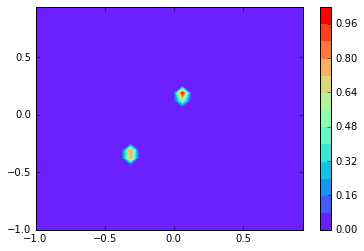

[3/11][7000/10000] Loss_D: -1.0000 Loss_G: -1.0000 D(x): 1.0000 D(G(z)): 1.0000 / 1.0000


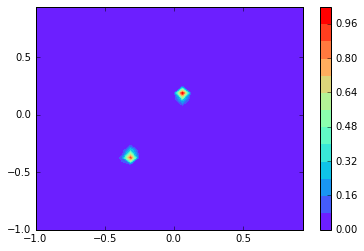

[3/11][8000/10000] Loss_D: -1.0000 Loss_G: -1.0000 D(x): 1.0000 D(G(z)): 1.0000 / 1.0000


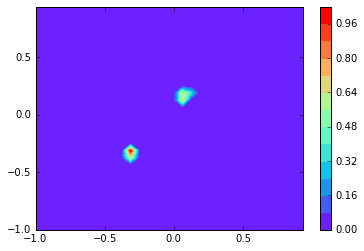

[3/11][9000/10000] Loss_D: -1.0000 Loss_G: -1.0000 D(x): 1.0000 D(G(z)): 1.0000 / 1.0000


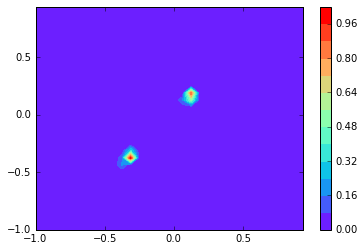

[4/11][0/10000] Loss_D: -1.0000 Loss_G: -1.0000 D(x): 1.0000 D(G(z)): 1.0000 / 1.0000


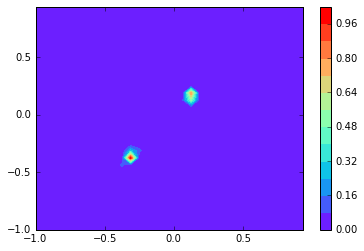

[4/11][1000/10000] Loss_D: -1.0000 Loss_G: -1.0000 D(x): 1.0000 D(G(z)): 1.0000 / 1.0000


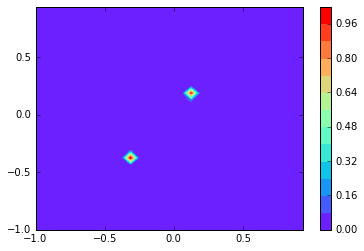

[4/11][2000/10000] Loss_D: -1.0000 Loss_G: -1.0000 D(x): 1.0000 D(G(z)): 1.0000 / 1.0000


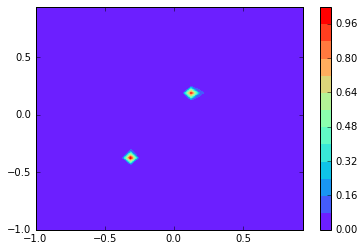

[4/11][3000/10000] Loss_D: -1.0000 Loss_G: -1.0000 D(x): 1.0000 D(G(z)): 1.0000 / 1.0000


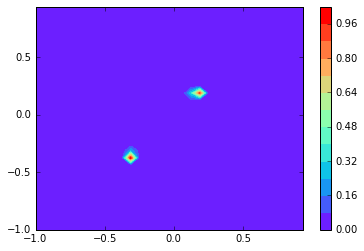

[4/11][4000/10000] Loss_D: -1.0000 Loss_G: -1.0000 D(x): 1.0000 D(G(z)): 1.0000 / 1.0000


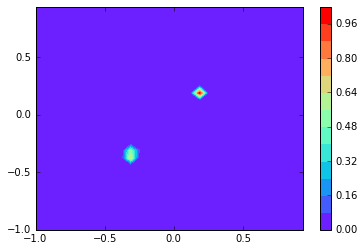

[4/11][5000/10000] Loss_D: -1.0000 Loss_G: -1.0000 D(x): 1.0000 D(G(z)): 1.0000 / 1.0000


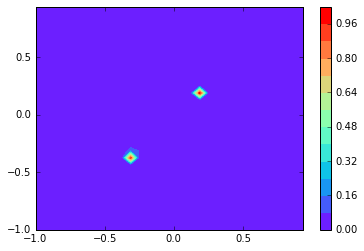

[4/11][6000/10000] Loss_D: -1.0000 Loss_G: -1.0000 D(x): 1.0000 D(G(z)): 1.0000 / 1.0000


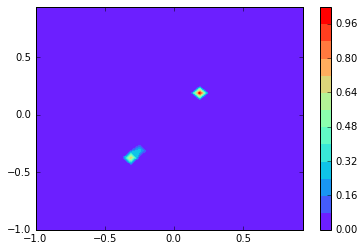

[4/11][7000/10000] Loss_D: -1.0000 Loss_G: -1.0000 D(x): 1.0000 D(G(z)): 1.0000 / 1.0000


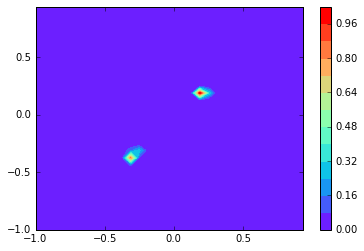

[4/11][8000/10000] Loss_D: -1.0000 Loss_G: -1.0000 D(x): 1.0000 D(G(z)): 1.0000 / 1.0000


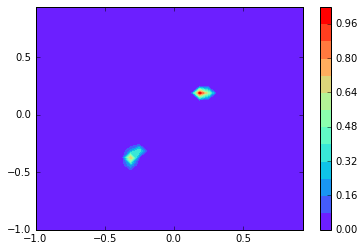

[4/11][9000/10000] Loss_D: -1.0000 Loss_G: -1.0000 D(x): 1.0000 D(G(z)): 1.0000 / 1.0000


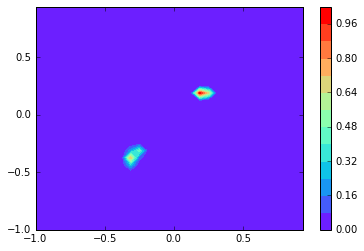

[5/11][0/10000] Loss_D: -1.0000 Loss_G: -1.0000 D(x): 1.0000 D(G(z)): 1.0000 / 1.0000


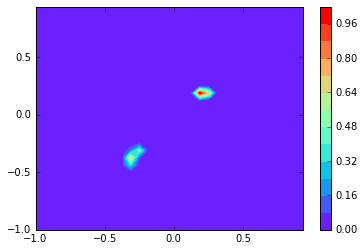

[5/11][1000/10000] Loss_D: -1.0000 Loss_G: -1.0000 D(x): 1.0000 D(G(z)): 1.0000 / 1.0000


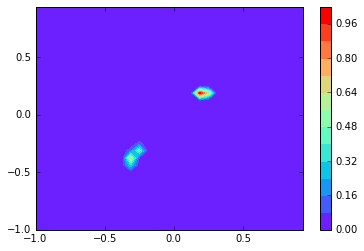

[5/11][2000/10000] Loss_D: -1.0000 Loss_G: -1.0000 D(x): 1.0000 D(G(z)): 1.0000 / 1.0000


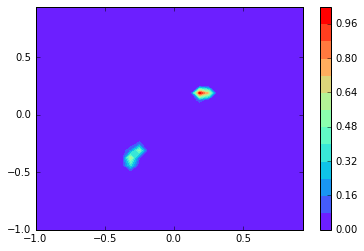

[5/11][3000/10000] Loss_D: -1.0000 Loss_G: -1.0000 D(x): 1.0000 D(G(z)): 1.0000 / 1.0000


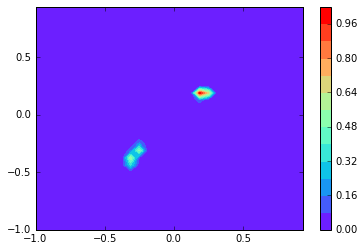

[5/11][4000/10000] Loss_D: -1.0000 Loss_G: -1.0000 D(x): 1.0000 D(G(z)): 1.0000 / 1.0000


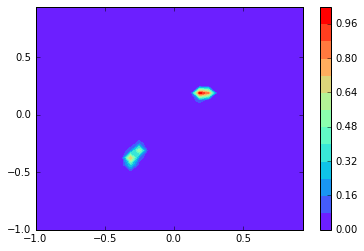

[5/11][5000/10000] Loss_D: -1.0000 Loss_G: -1.0000 D(x): 1.0000 D(G(z)): 1.0000 / 1.0000


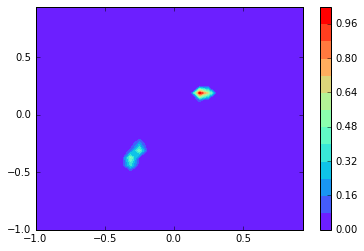

[5/11][6000/10000] Loss_D: -1.0000 Loss_G: -1.0000 D(x): 1.0000 D(G(z)): 1.0000 / 1.0000


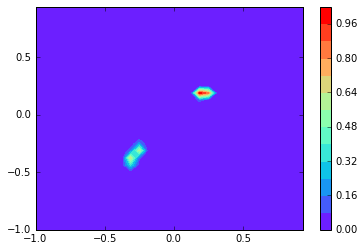

[5/11][7000/10000] Loss_D: -1.0000 Loss_G: -1.0000 D(x): 1.0000 D(G(z)): 1.0000 / 1.0000


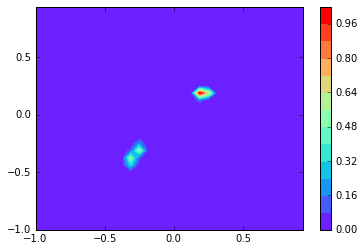

[5/11][8000/10000] Loss_D: -1.0000 Loss_G: -1.0000 D(x): 1.0000 D(G(z)): 1.0000 / 1.0000


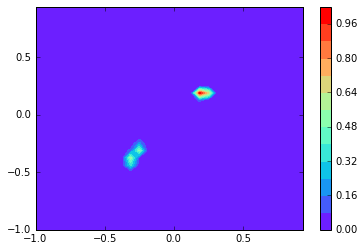

[5/11][9000/10000] Loss_D: -1.0000 Loss_G: -1.0000 D(x): 1.0000 D(G(z)): 1.0000 / 1.0000


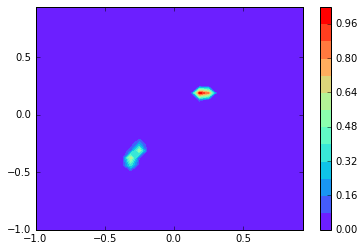

[6/11][0/10000] Loss_D: -1.0000 Loss_G: -1.0000 D(x): 1.0000 D(G(z)): 1.0000 / 1.0000


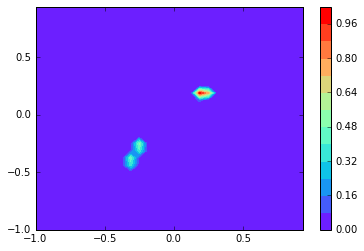

[6/11][1000/10000] Loss_D: -1.0000 Loss_G: -1.0000 D(x): 1.0000 D(G(z)): 1.0000 / 1.0000


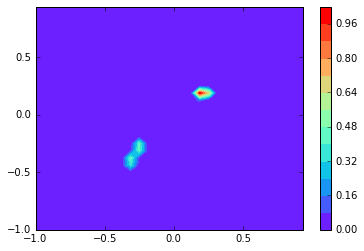

[6/11][2000/10000] Loss_D: -1.0000 Loss_G: -1.0000 D(x): 1.0000 D(G(z)): 1.0000 / 1.0000


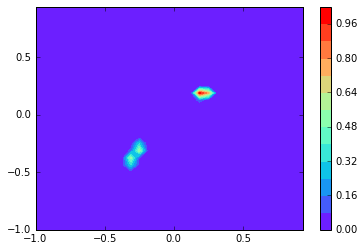

[6/11][3000/10000] Loss_D: -1.0000 Loss_G: -1.0000 D(x): 1.0000 D(G(z)): 1.0000 / 1.0000


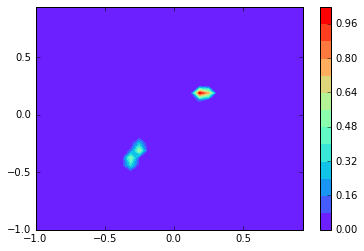

[6/11][4000/10000] Loss_D: -1.0000 Loss_G: -1.0000 D(x): 1.0000 D(G(z)): 1.0000 / 1.0000


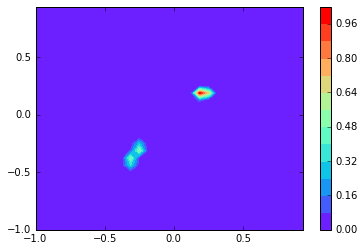

[6/11][5000/10000] Loss_D: -1.0000 Loss_G: -1.0000 D(x): 1.0000 D(G(z)): 1.0000 / 1.0000


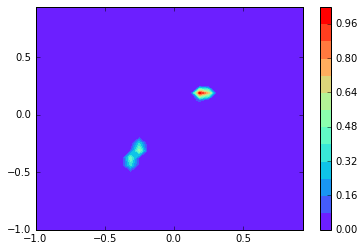

[6/11][6000/10000] Loss_D: -1.0000 Loss_G: -1.0000 D(x): 1.0000 D(G(z)): 1.0000 / 1.0000


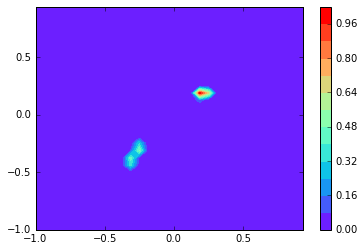

[6/11][7000/10000] Loss_D: -1.0000 Loss_G: -1.0000 D(x): 1.0000 D(G(z)): 1.0000 / 1.0000


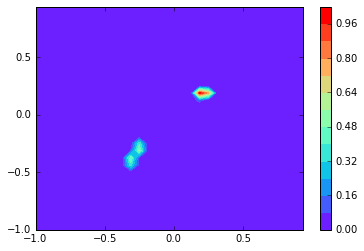

[6/11][8000/10000] Loss_D: -1.0000 Loss_G: -1.0000 D(x): 1.0000 D(G(z)): 1.0000 / 1.0000


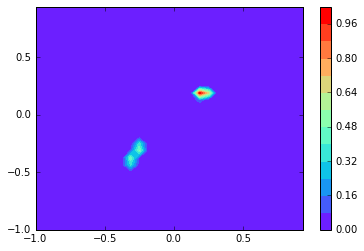

[6/11][9000/10000] Loss_D: -1.0000 Loss_G: -1.0000 D(x): 1.0000 D(G(z)): 1.0000 / 1.0000


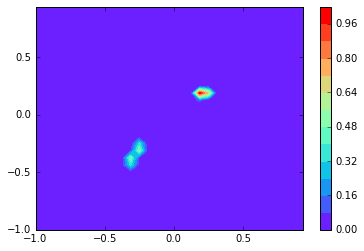

[7/11][0/10000] Loss_D: -1.0000 Loss_G: -1.0000 D(x): 1.0000 D(G(z)): 1.0000 / 1.0000


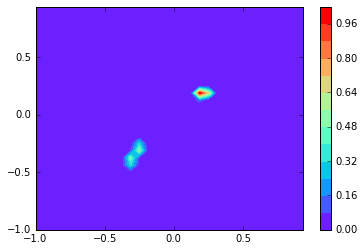

[7/11][1000/10000] Loss_D: -1.0000 Loss_G: -1.0000 D(x): 1.0000 D(G(z)): 1.0000 / 1.0000


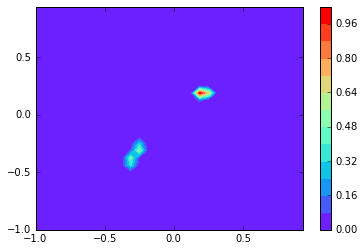

[7/11][2000/10000] Loss_D: -1.0000 Loss_G: -1.0000 D(x): 1.0000 D(G(z)): 1.0000 / 1.0000


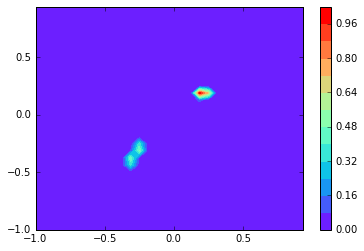

[7/11][3000/10000] Loss_D: -1.0000 Loss_G: -1.0000 D(x): 1.0000 D(G(z)): 1.0000 / 1.0000


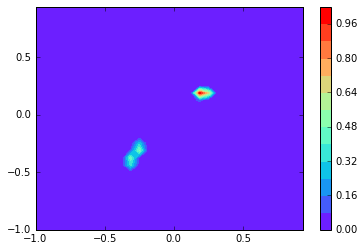

[7/11][4000/10000] Loss_D: -1.0000 Loss_G: -1.0000 D(x): 1.0000 D(G(z)): 1.0000 / 1.0000


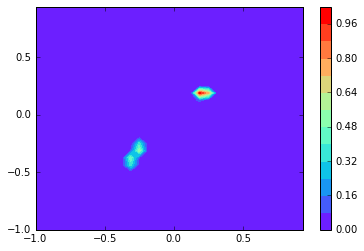

[7/11][5000/10000] Loss_D: -1.0000 Loss_G: -1.0000 D(x): 1.0000 D(G(z)): 1.0000 / 1.0000


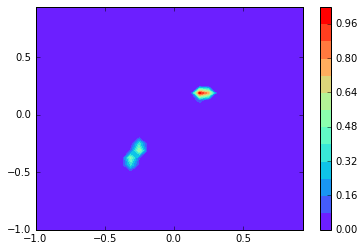

[7/11][6000/10000] Loss_D: -1.0000 Loss_G: -1.0000 D(x): 1.0000 D(G(z)): 1.0000 / 1.0000


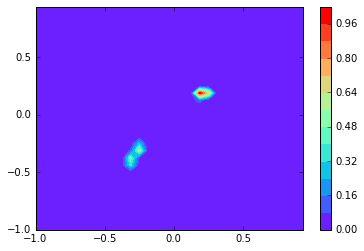

[7/11][7000/10000] Loss_D: -1.0000 Loss_G: -1.0000 D(x): 1.0000 D(G(z)): 1.0000 / 1.0000


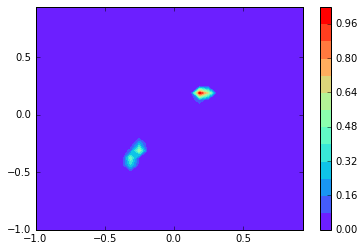

[7/11][8000/10000] Loss_D: -1.0000 Loss_G: -1.0000 D(x): 1.0000 D(G(z)): 1.0000 / 1.0000


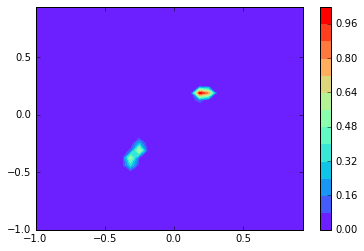

[7/11][9000/10000] Loss_D: -1.0000 Loss_G: -1.0000 D(x): 1.0000 D(G(z)): 1.0000 / 1.0000


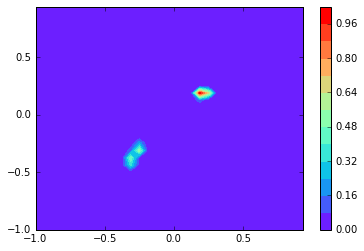

[8/11][0/10000] Loss_D: -1.0000 Loss_G: -1.0000 D(x): 1.0000 D(G(z)): 1.0000 / 1.0000


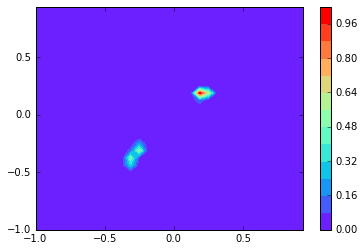

[8/11][1000/10000] Loss_D: -1.0000 Loss_G: -1.0000 D(x): 1.0000 D(G(z)): 1.0000 / 1.0000


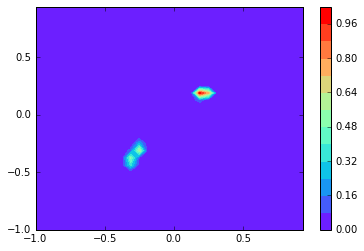

[8/11][2000/10000] Loss_D: -1.0000 Loss_G: -1.0000 D(x): 1.0000 D(G(z)): 1.0000 / 1.0000


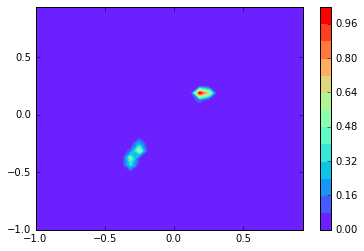

[8/11][3000/10000] Loss_D: -1.0000 Loss_G: -1.0000 D(x): 1.0000 D(G(z)): 1.0000 / 1.0000


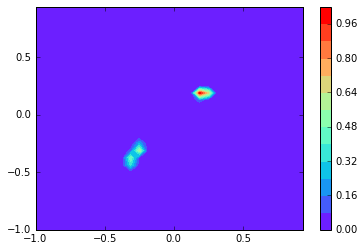

[8/11][4000/10000] Loss_D: -1.0000 Loss_G: -1.0000 D(x): 1.0000 D(G(z)): 1.0000 / 1.0000


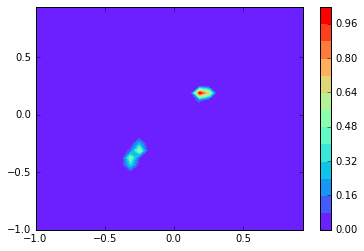

[8/11][5000/10000] Loss_D: -1.0000 Loss_G: -1.0000 D(x): 1.0000 D(G(z)): 1.0000 / 1.0000


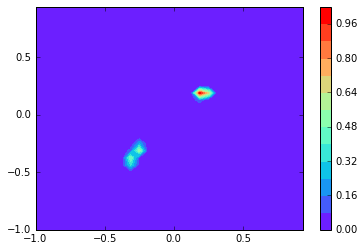

[8/11][6000/10000] Loss_D: -1.0000 Loss_G: -1.0000 D(x): 1.0000 D(G(z)): 1.0000 / 1.0000


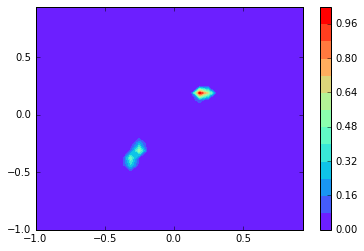

[8/11][7000/10000] Loss_D: -1.0000 Loss_G: -1.0000 D(x): 1.0000 D(G(z)): 1.0000 / 1.0000


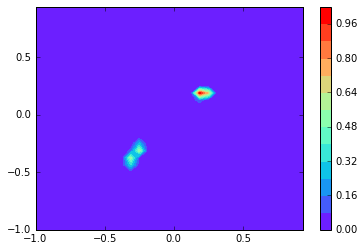

[8/11][8000/10000] Loss_D: -1.0000 Loss_G: -1.0000 D(x): 1.0000 D(G(z)): 1.0000 / 1.0000


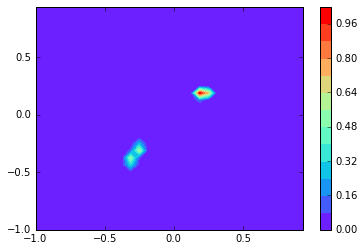

[8/11][9000/10000] Loss_D: -1.0000 Loss_G: -1.0000 D(x): 1.0000 D(G(z)): 1.0000 / 1.0000


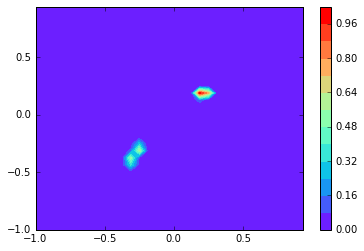

[9/11][0/10000] Loss_D: -1.0000 Loss_G: -1.0000 D(x): 1.0000 D(G(z)): 1.0000 / 1.0000


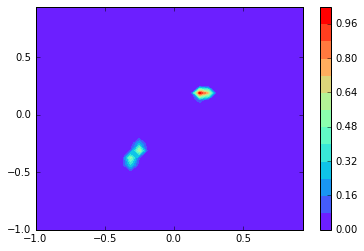

[9/11][1000/10000] Loss_D: -1.0000 Loss_G: -1.0000 D(x): 1.0000 D(G(z)): 1.0000 / 1.0000


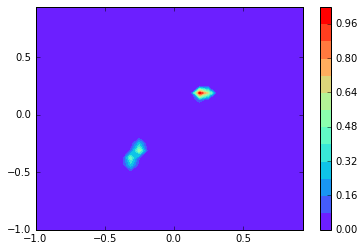

[9/11][2000/10000] Loss_D: -1.0000 Loss_G: -1.0000 D(x): 1.0000 D(G(z)): 1.0000 / 1.0000


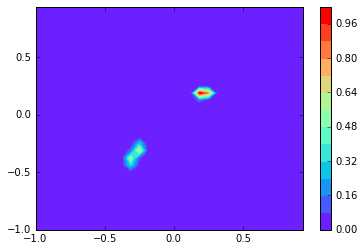

[9/11][3000/10000] Loss_D: -1.0000 Loss_G: -1.0000 D(x): 1.0000 D(G(z)): 1.0000 / 1.0000


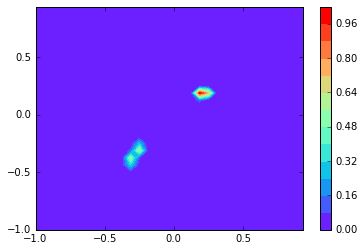

[9/11][4000/10000] Loss_D: -1.0000 Loss_G: -1.0000 D(x): 1.0000 D(G(z)): 1.0000 / 1.0000


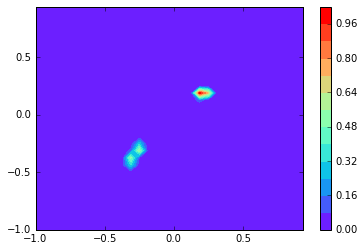

[9/11][5000/10000] Loss_D: -1.0000 Loss_G: -1.0000 D(x): 1.0000 D(G(z)): 1.0000 / 1.0000


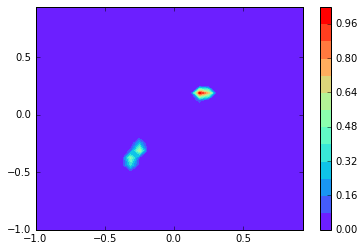

[9/11][6000/10000] Loss_D: -1.0000 Loss_G: -1.0000 D(x): 1.0000 D(G(z)): 1.0000 / 1.0000


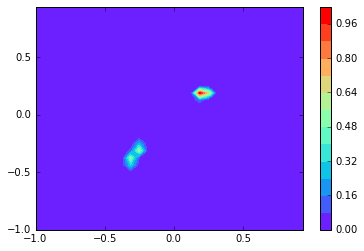

[9/11][7000/10000] Loss_D: -1.0000 Loss_G: -1.0000 D(x): 1.0000 D(G(z)): 1.0000 / 1.0000


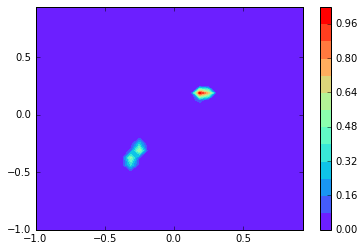

[9/11][8000/10000] Loss_D: -1.0000 Loss_G: -1.0000 D(x): 1.0000 D(G(z)): 1.0000 / 1.0000


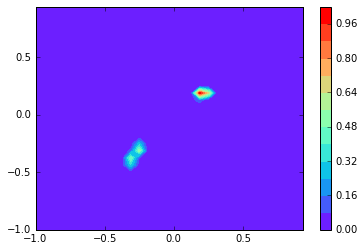

[9/11][9000/10000] Loss_D: -1.0000 Loss_G: -1.0000 D(x): 1.0000 D(G(z)): 1.0000 / 1.0000


In [143]:
print_every = nElements / 10

for epoch in range(niter):
    for i in range(nElements):
        ############################
        # (1) Update D network: maximize log(D(x)) + log(1 - D(G(z)))
        ###########################
        # train with real
        netD.zero_grad()
        real_cpu = GMutils.sample(batchSize)
        batch_size = real_cpu.size(0)
        input.data.resize_(real_cpu.size()).copy_(real_cpu)
        label.data.resize_(batch_size).fill_(real_label)

        output = netD(input)
        errD_real = criterion(output, label)
        errD_real.backward()
        D_x = output.data.mean()

        # train with fake
        # Change Here also
        noise.data.resize_(batch_size, nz)
        noise.data.normal_(0, 1)
        fake = netG(noise).detach()
        label.data.fill_(fake_label)
        output = netD(fake)
        errD_fake = criterion(output, label)
        errD_fake.backward()
        D_G_z1 = output.data.mean()
        errD = errD_real + errD_fake
        optimizerD.step()

        ############################
        # (2) Update G network: maximize log(D(G(z)))
        ###########################
        netG.zero_grad()
        label.data.fill_(real_label) # fake labels are real for generator cost
        noise.data.normal_(0, 1)
        fake = netG(noise)
        output = netD(fake)
        errG = criterion(output, label)
        errG.backward()
        D_G_z2 = output.data.mean()
        optimizerG.step()
        
        if i % print_every == 0:
            GMutils.plot_heat_map(GanUtils.sample_G(netG, nz, 10000))
            print('[%d/%d][%d/%d] Loss_D: %.4f Loss_G: %.4f D(x): %.4f D(G(z)): %.4f / %.4f'
              % (epoch, niter + 1, i, nElements,
                 errD.data[0], errG.data[0], D_x, D_G_z1, D_G_z2))